### Data 622  Project
##### Marco Siqueira Campos

#### Recognize individual handwritten digits
#### MNIST network modeling with Deep Learning



##### Import module to plot graphs

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

##### Import main module

In [2]:
import numpy as np
import random

##### Function Sigmoid Neuron

In [3]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


#### The Network Class

This class represent a neural network and its initialization  

Where net=Network([2,3,1]) represents respectively, the number of neurons:  
First layer = 2  
Second layer (hidden)= 3  
Last layer = 1  

The biases and weight are initilized randomly  

#### Methods

* feedforward
* SGD
* update_mini_batch
* backprop
* evaluate
* cost_derivative


In [4]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print "Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test)
            else:
                print "Epoch {0} complete".format(j)

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)
    
    def printElements(self):
        """ Print the elements of the current instance of the neural network """
        print 'This neural network has: \n {} number of layers, \n {} neurons in each layer, \n {}as biases for each layer, and \n {} as weights for each layer.'.format(self.num_layers,self.sizes,self.biases,self.weights)

##### Import the file mnist_loader
This file help to load the data 

In [5]:
import mnist_loader

##### Load the train, test and validation data from mnist_loader 

In [6]:
train_set, validation_set, test_set = mnist_loader.load_data_wrapper()

##### Visually check the data sample

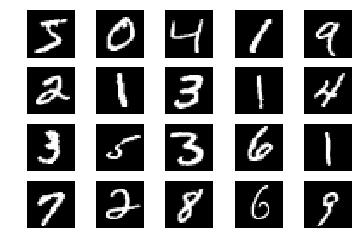

In [7]:
ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    # train_set[i][0] is i-th image data with size 28x28
    image = train_set[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    plt.axis('off')  
plt.show()

##### Set-up a Neuron Network 

In [8]:
# My set-up 784 1st layer, 30 2nd layer and 10 3rd layer
myNet = Network([784,35,10])

##### Perform SGD Stochastic Gradient Descent

In [9]:
myNet.SGD(train_set, epochs = 35, mini_batch_size = 10, eta = 3.0, test_data = test_set)

Epoch 0: 9094 / 10000
Epoch 1: 9228 / 10000
Epoch 2: 9332 / 10000
Epoch 3: 9405 / 10000
Epoch 4: 9441 / 10000
Epoch 5: 9424 / 10000
Epoch 6: 9412 / 10000
Epoch 7: 9477 / 10000
Epoch 8: 9444 / 10000
Epoch 9: 9469 / 10000
Epoch 10: 9482 / 10000
Epoch 11: 9502 / 10000
Epoch 12: 9478 / 10000
Epoch 13: 9492 / 10000
Epoch 14: 9498 / 10000
Epoch 15: 9502 / 10000
Epoch 16: 9517 / 10000
Epoch 17: 9536 / 10000
Epoch 18: 9523 / 10000
Epoch 19: 9520 / 10000
Epoch 20: 9519 / 10000
Epoch 21: 9540 / 10000
Epoch 22: 9485 / 10000
Epoch 23: 9518 / 10000
Epoch 24: 9548 / 10000
Epoch 25: 9515 / 10000
Epoch 26: 9514 / 10000
Epoch 27: 9537 / 10000
Epoch 28: 9539 / 10000
Epoch 29: 9510 / 10000
Epoch 30: 9536 / 10000
Epoch 31: 9527 / 10000
Epoch 32: 9533 / 10000
Epoch 33: 9523 / 10000
Epoch 34: 9532 / 10000
